In [73]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/하태권/Downloads/kc_house_data.csv") #데이터 로딩
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [77]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [79]:
df = df.drop(columns=['id', 'date'])


In [81]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


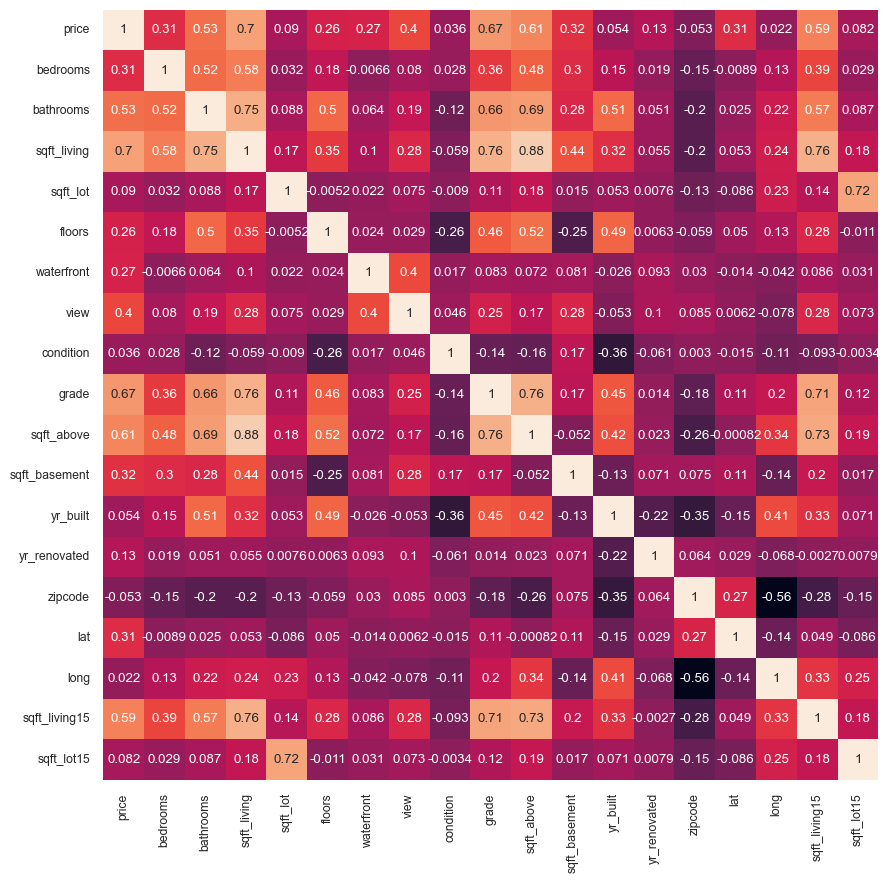

In [83]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [84]:
df = df.drop(columns=['condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530,0,0,47.6993,1530
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310,0,0,47.5107,1830
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020,0,0,47.5944,1020
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600,0,0,47.5345,1410


In [85]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
lat              0
sqft_living15    0
dtype: int64

In [86]:
df['price'].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [87]:
X = df.drop(columns=['price']) 
y = df['price']


In [93]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,1340
1,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,1690
2,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,2720
3,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,1360
4,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,1800


In [97]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 13) (17290,)
(4323, 13) (4323,)


In [99]:
# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # 회귀 모델이므로 출력층 활성화 함수 없음
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 요약 확인
model.summary()

C:\Userai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 35281895424.0000 - mae: 118253.8203 - val_loss: 43361882112.0000 - val_mae: 123162.9375
Epoch 2/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 37727440896.0000 - mae: 120147.1641 - val_loss: 43892326400.0000 - val_mae: 121757.5312
Epoch 3/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 35208470528.0000 - mae: 117737.4609 - val_loss: 43473887232.0000 - val_mae: 122448.1016
Epoch 4/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 36112359424.0000 - mae: 118735.4062 - val_loss: 43582652416.0000 - val_mae: 121973.2109
Epoch 5/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34543030272.0000 - mae: 118088.5312 - val_loss: 43817807872.0000 - val_mae: 121348.7344
Epoch 6/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 35668221952.0000 - mae: 118371.6328 - val_loss: 43385184256.0000 - val_mae: 121834.4453
Epoch 7/50
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 35041120256.0000 - mae: 116537.8750 - val_loss: 4321

In [113]:
model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1798252916495089664.0000 - mae: 734631744.0000


[1.6170781392492298e+18, 719172608.0]

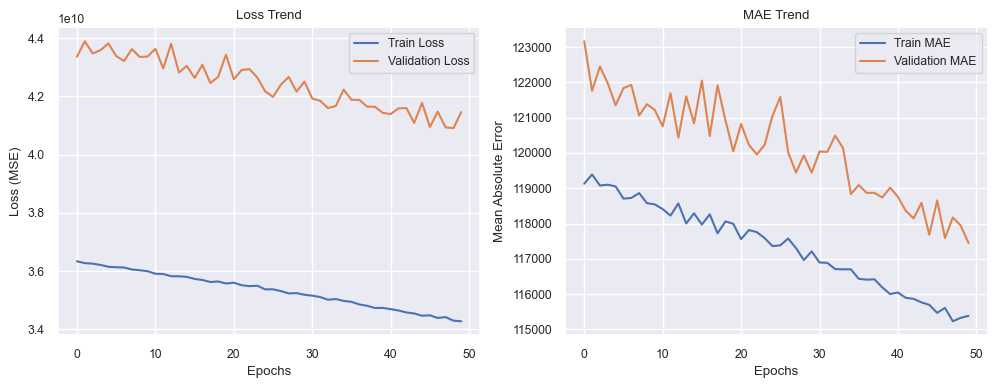

In [115]:
plt.figure(figsize=(12, 4))

# 손실 값 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Loss Trend')

# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Trend')

plt.show()


In [117]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae:.2f}')

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39376592896.0000 - mae: 117276.3750
Test MAE: 117445.66
